In [2]:
import tensorflow as tf

#Files Processing
import pandas as pd

#Data Visualization
import seaborn as sns

#Data Visualization
import matplotlib.pyplot as plt

In [7]:
training_set=pd.read_csv('C:/AI/boston_train.csv')
testing_set=pd.read_csv('C:/AI/boston_test.csv')
prediction_set=pd.read_csv('C:/AI/boston_predict.csv')

In [8]:
training_set

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,2.30040,0.0,19.58,0.605,6.319,96.1,2.1000,403,14.7,23.8
1,13.35980,0.0,18.10,0.693,5.887,94.7,1.7821,666,20.2,12.7
2,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,233,17.9,26.6
3,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,305,19.2,21.7
4,0.03768,80.0,1.52,0.404,7.274,38.3,7.3090,329,12.6,34.6
...,...,...,...,...,...,...,...,...,...,...
395,0.23912,0.0,9.69,0.585,6.019,65.3,2.4091,391,19.2,21.2
396,0.04560,0.0,13.89,0.550,5.888,56.0,3.1121,276,16.4,23.3
397,1.38799,0.0,8.14,0.538,5.950,82.0,3.9900,307,21.0,13.2
398,7.36711,0.0,18.10,0.679,6.193,78.1,1.9356,666,20.2,11.0


In [10]:
training_set.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
CRIM,1.000000,-0.197764,0.383433,0.407698,-0.219043,0.350003,-0.377643,0.563791,0.284306,-0.375836
ZN,-0.197764,1.000000,-0.532929,-0.521745,0.328418,-0.561062,0.665677,-0.323539,-0.393904,0.365931
INDUS,0.383433,-0.532929,1.000000,0.758157,-0.393738,0.644559,-0.717796,0.722435,0.386248,-0.465083
NOX,0.407698,-0.521745,0.758157,1.000000,-0.309519,0.735999,-0.776624,0.664923,0.185284,-0.410425
RM,-0.219043,0.328418,-0.393738,-0.309519,1.000000,-0.253271,0.211441,-0.302268,-0.395436,0.685041
AGE,0.350003,-0.561062,0.644559,0.735999,-0.253271,1.000000,-0.742486,0.521723,0.260205,-0.368922
DIS,-0.377643,0.665677,-0.717796,-0.776624,0.211441,-0.742486,1.000000,-0.555040,-0.227288,0.236714
TAX,0.563791,-0.323539,0.722435,0.664923,-0.302268,0.521723,-0.555040,1.000000,0.473023,-0.449570
PTRATIO,0.284306,-0.393904,0.386248,0.185284,-0.395436,0.260205,-0.227288,0.473023,1.000000,-0.531764
MEDV,-0.375836,0.365931,-0.465083,-0.410425,0.685041,-0.368922,0.236714,-0.449570,-0.531764,1.000000


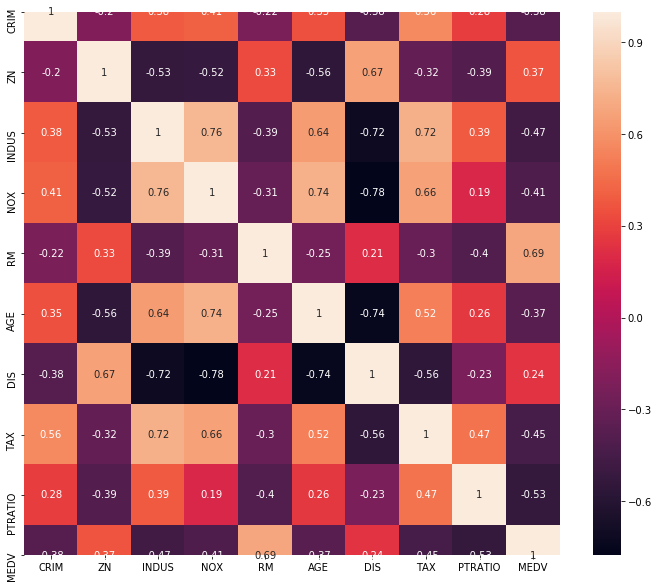

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(training_set.corr(),annot=True)

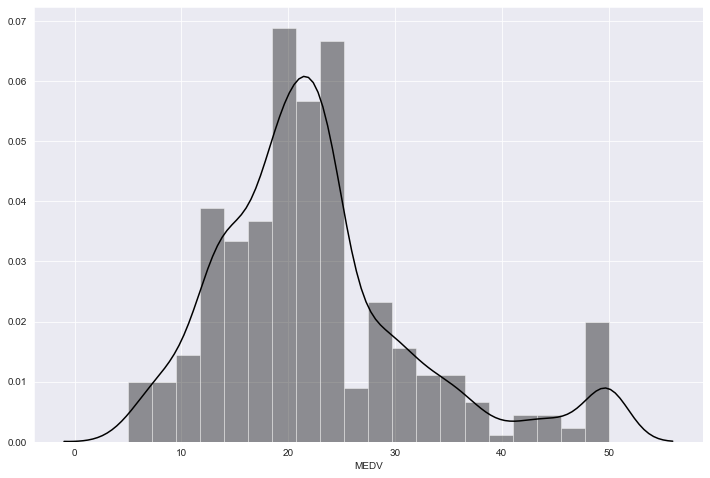

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.distplot(training_set['MEDV'],color='black')

In [23]:
X_train=training_set.drop('MEDV',axis=1)

In [24]:
Y_train=training_set['MEDV']

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
def build_model():
    # Define the model - Sequential Model 
    # Activation function - ReLU, tf.nn.sigmoid
    model = keras.Sequential([
    layers.Dense(128, activation=tf.nn.relu, 
                 input_shape=[len(X_train.keys())]),
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(1)
  ])
    # Model Optimizer - To optimize loss function
    optimizer = tf.keras.optimizers.RMSprop(0.005)
    #optimizer = 'adam'
    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 
                         'mean_squared_error'])
    return model

In [38]:
model=build_model()

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 67,329
Trainable params: 67,329
Non-trainable params: 0
_________________________________________________________________


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
#Scal both the training inputs and outputs
scaled_train=scaler.fit_transform(X_train)

In [41]:
scaled_train_df=pd.DataFrame(scaled_train,columns=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO'])

In [42]:
    EPCHOS=50
    ##fit means training the dataset
    history=model.fit(scaled_train_df,Y_train,
                     epochs=EPCHOS,validation_split=0.2)

Train on 320 samples, validate on 80 samples
Epoch 1/50
320/320 [==============================] - 0s 970us/sample - loss: 236.0738 - mean_absolute_error: 11.6247 - mean_squared_error: 236.0738 - val_loss: 66.5007 - val_mean_absolute_error: 6.0459 - val_mean_squared_error: 66.5007
Epoch 2/50
320/320 [==============================] - 0s 144us/sample - loss: 118.8796 - mean_absolute_error: 8.2935 - mean_squared_error: 118.8796 - val_loss: 52.7146 - val_mean_absolute_error: 5.3732 - val_mean_squared_error: 52.7146
Epoch 3/50
320/320 [==============================] - 0s 146us/sample - loss: 69.2201 - mean_absolute_error: 6.1473 - mean_squared_error: 69.2201 - val_loss: 43.3505 - val_mean_absolute_error: 5.0428 - val_mean_squared_error: 43.3505
Epoch 4/50
320/320 [==============================] - 0s 135us/sample - loss: 45.8693 - mean_absolute_error: 4.7799 - mean_squared_error: 45.8693 - val_loss: 64.3396 - val_mean_absolute_error: 6.0078 - val_mean_squared_error: 64.3396
Epoch 5/50
320

In [43]:
X_test = testing_set.drop('MEDV', axis = 1)
Y_test = testing_set['MEDV']

In [44]:
scaled_test = scaler.fit_transform(X_test)

In [45]:
scaled_train_df = pd.DataFrame(scaled_test, 
                               columns=['CRIM','ZN','INDUS','NOX','RM',
                                        'AGE','DIS','TAX','PTRATIO'])

In [46]:
# Prediction of  data from Neural Network
Y_test_pred = model.predict(scaled_train_df)

In [47]:
Y_test_pred

array([[19.065575 ],
       [28.370808 ],
       [19.03499  ],
       [31.469707 ],
       [36.966442 ],
       [21.433626 ],
       [21.863176 ],
       [21.876099 ],
       [30.244051 ],
       [17.97605  ],
       [24.430851 ],
       [17.06399  ],
       [19.559378 ],
       [55.873425 ],
       [11.124372 ],
       [17.110825 ],
       [30.032751 ],
       [15.9811735],
       [23.888845 ],
       [16.790812 ],
       [11.095119 ],
       [16.806063 ],
       [23.745514 ],
       [11.315057 ],
       [15.6576805],
       [18.064352 ],
       [28.484716 ],
       [35.14045  ],
       [19.864496 ],
       [19.53102  ],
       [19.925665 ],
       [18.657236 ],
       [26.306871 ],
       [31.013966 ],
       [35.915615 ],
       [19.629465 ],
       [18.876732 ],
       [42.491665 ],
       [21.652658 ],
       [17.595518 ],
       [18.447496 ],
       [21.84994  ],
       [16.857037 ],
       [17.831163 ],
       [11.323697 ],
       [12.860382 ],
       [14.759107 ],
       [16.81

In [48]:
# Mean Sqaured Error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Y_test,Y_test_pred)
print(MSE)

12.292925452623164
